
<body>
  <h2><font color="blue">Maximizing Conversions: A Comprehensive Study of Leads & Sales Performance</font></h2>
</body>

## Introduction

This notebook presents an analysis of lead conversion data collected from a travel booking company. The dataset includes various attributes related to leads, their sources, assigned agents, enquiry destinations, and the outcomes of these leads. By examining this data, we aim to uncover key insights and trends that can help in understanding the effectiveness of different lead sources, the performance of agents, and the preferences of clients.

![image](94676301.cms.jpeg)
---



### Dataset Overview

The dataset contains the following columns:

- **Lead Date:** The date when the lead was generated.
- **Lead Source:** The origin of the lead (e.g., website, referral, advertisement).
- **Name:** The name of the lead.
- **Phone:** The contact phone number of the lead.
- **Assigned To:** The agent assigned to handle the lead.
- **Enquiry Destination:** The travel destination the lead is interested in.
- **ExClient:** A flag indicating whether the lead is an existing client.
- **Status:** The current status of the lead (e.g., converted, not converted (Blank).
- **Conversion Date:** The date when the lead was converted (if applicable).
- **Trip:** Trip Name.
- **Trip Date:** The date of the booked trip (if applicable).
- **Booking ID:** The unique identifier for the booking (if applicable).
- **Pax:** The number of passengers for the booking.
- **Per Person Cost:** The cost per person for the trip.
- **Total Bill:** The total bill amount for the booking.
- **Converted By:** The agent who converted the lead.
- **Date:** The lead date (minus the timestamp). -- An Extracted Column
- **Month:** The month of lead date -- An Extracted Column

---

### Objectives

Through this analysis, we aim to answer several key questions:

1. What are the overall trends in lead generation and conversion?
2. Which lead sources are most effective in generating conversions?
3. How do different enquiry destinations fare in terms of conversion rates?
4. What is the performance of individual agents in terms of conversion rates?
5. Are there any notable patterns or anomalies in the data?

By the end of this analysis, I hope to provide actionable insights and strategic recommendations to enhance lead conversion rates and overall business performance.


## Executive Summary

This analysis of lead conversion data from a travel booking company highlights key insights and strategic recommendations to improve business performance. Key findings include:

- **Popular Destinations**: Ladakh and Spiti Valley are the most sought-after destinations.
- **High Revenue Destination**: Ladakh has the highest average total bill for bookings.
- **Top Performers**: Sales Person 33 has the highest conversion rate, while Sales Person 0 contributes the most to overall conversions.
- **Lead Source and Timing**: The majority of leads come from Lead Source 1, with peak lead volume occurring in August.
- **2024 Performance Decline**: There is a notable decrease in trip counts and revenue in 2024 compared to 2023.

### Recommendations

1. **Reduce Dependency on Lead Source 1**:
   - Diversify lead generation strategies.

2. **Improve Sales Personnel Conversion Rates**:
   - Provide targeted training and resources to underperforming sales staff.

3. **Promote Underperforming Destinations**:
   - Run discounts and special promotions.

4. **Capitalize on Peak Periods**:
   - Focus marketing efforts during high lead months like August.

5. **Investigate 2024 Performance**:
   - Analyze factors contributing to the decline and adjust strategies.

By implementing these recommendations, the company can enhance lead management, improve conversion rates, and drive sustainable growth.

In [1]:
#Importing Essential Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import sqlite3
plt.rcParams['figure.figsize'] = (25,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
#reading the CSV
PATH = r'https://raw.githubusercontent.com/dakshbhatnagar/Datasets/main/sales_conversion/Data.csv'
df = pd.read_csv(PATH)
#removing the spaces in column names
df.columns = [i.replace(" ", "") for i in df.columns]

In [3]:
cols = list(df.columns[df.columns.str.contains('Date')])
for i in cols:
    df[i] = pd.to_datetime(df[i])

In [4]:
df.head()

,LeadDate,LeadSource,Name,Phone,AssignedTo,EnquiryDestination,ExClient,Status,ConversionDate,Trip,TripDate,BookingID,Pax,PerPersonCost,TotalBill,ConvertedBy,Date,Month
0,2023-07-16 05:34:00,Lead Source 1,jzjwPXoyff nrw,(&))^!%@!!,Sales Person 1,Vietnam,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul
1,2023-07-16 05:39:00,Lead Source 2,mfz|Xn iwnnwY,*@!!@%*$##,Sales Person 2,Andaman,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul
2,2023-07-16 05:39:00,Lead Source 1,wwmâMãmgxm Çä,*)((^#@)!#,Sales Person 0,Himachal Trips,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul
3,2023-07-16 05:42:00,Lead Source 1,lZ sf XfmsfWwyn,(&$)##!@)%,Sales Person 3,Ladakh,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul
4,2023-07-16 05:55:00,Lead Source 1,fXwnfwfsXpl,)*&%($$$##,Sales Person 0,Spiti Valley,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-07-16,Jul


In [5]:
#Null value counts (in %)
round(df.isnull().sum()/len(df)*100,2)

LeadDate               0.00
LeadSource             0.00
Name                   0.36
Phone                  0.00
AssignedTo             0.00
EnquiryDestination     6.48
ExClient              96.34
Status                96.54
ConversionDate        96.54
Trip                  96.54
TripDate              96.54
BookingID             96.54
Pax                   96.54
PerPersonCost         96.54
TotalBill             96.54
ConvertedBy           96.54
Date                   0.00
Month                  0.00
dtype: float64

In [6]:
#Some statistical Info about numerical columns
df.describe()

,LeadDate,ConversionDate,TripDate,Pax,PerPersonCost,TotalBill,Date
count,93481,3232,3232,3232.000000,3232.000000,3232.000000,93481
mean,2023-09-05 04:58:08.814411776,2023-09-14 01:47:53.970916096,2023-11-03 16:53:10.099010304,2.108911,2747.937191,5778.488552,2023-09-04 14:51:13.522961664
min,2023-07-16 05:34:00,2023-07-17 13:13:32,2023-06-17 00:00:00,1.000000,0.000000,0.000000,2023-07-16 00:00:00
25%,2023-08-13 01:20:00,2023-08-21 11:58:28,2023-09-11 18:00:00,1.000000,1764.000000,2142.000000,2023-08-13 00:00:00
50%,2023-09-04 19:25:00,2023-09-16 15:30:06.500000,2023-10-31 00:00:00,2.000000,2240.000000,4128.000000,2023-09-04 00:00:00
75%,2023-09-28 12:35:00,2023-10-10 14:17:22.750000128,2023-11-28 00:00:00,2.000000,3155.250000,6741.000000,2023-09-28 00:00:00
max,2023-10-24 23:56:00,2023-10-26 15:46:13,2024-06-14 00:00:00,21.000000,99760.000000,139680.000000,2023-10-24 00:00:00
std,NaN,NaN,NaN,1.652555,2849.761607,7114.953276,NaN


In [7]:
#setting up the sqlite3 database connection
conn = sqlite3.connect('data.db')

In [8]:
#Converting the data to SQLite3 DB file
df.to_sql('travels', conn, if_exists='replace', index=False)

93481

In [9]:
#Adding an Year Column and assigning it back to df
query = '''
select *, strftime('%Y', TripDate) AS TripYear from travels

'''
df = pd.read_sql(query, conn)

In [10]:
#Replacing the DB file with the added column
df.to_sql('travels', conn, if_exists='replace', index=False)

93481

In [11]:
light_blue ='#6d9eeb'
dark_blue = '#445e93'

## Broad Overview and Trends

1. **What is the total number of leads and conversions in the dataset?**

In [12]:
print(f'There are {len(df)} leads in the dataset')

There are 93481 leads in the dataset


In [13]:
conversions = len(df[df['Status']=='Converted'])
print(f'There are {conversions} Conversions in the dataset')

There are 3232 Conversions in the dataset



2. **What is the distribution of leads over different months?**

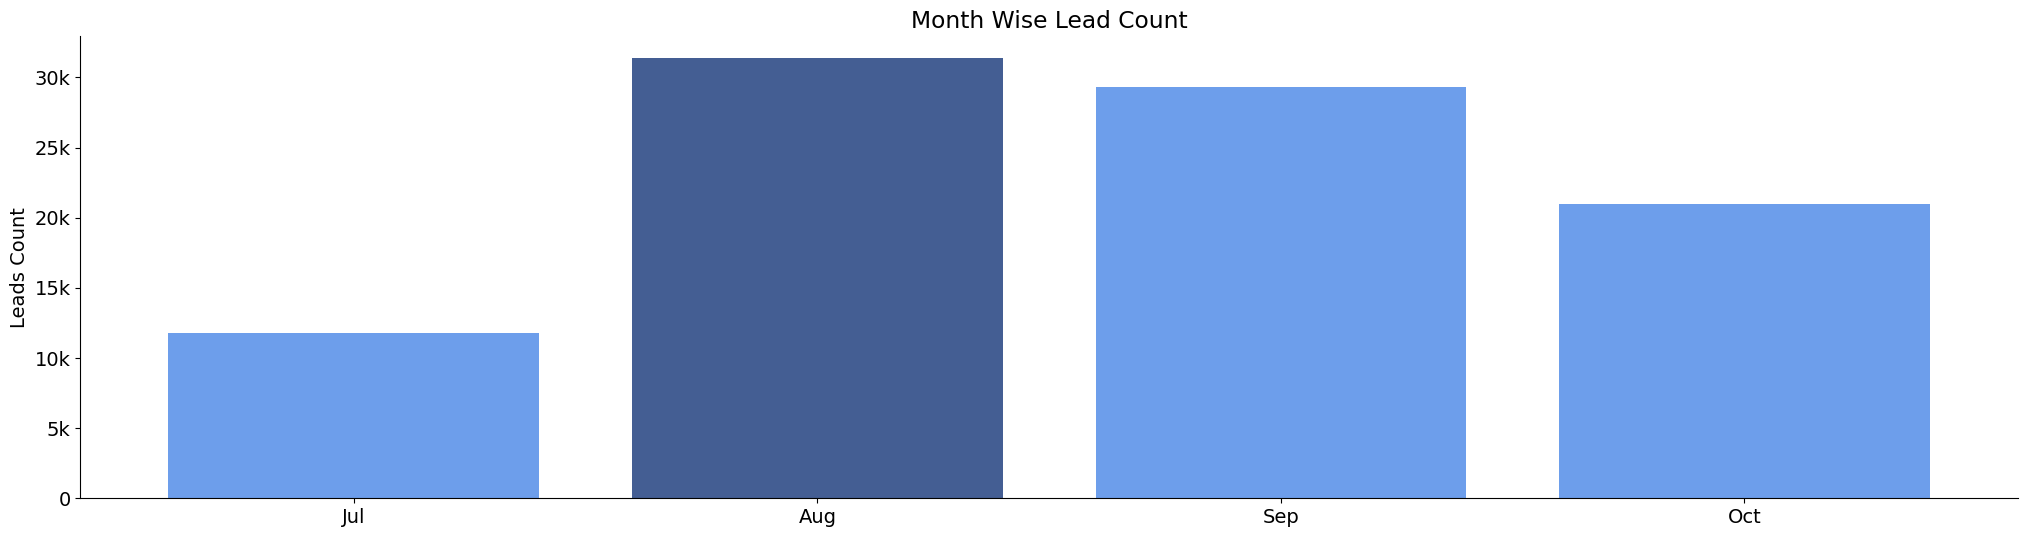

In [14]:
query = '''
select Month, count(Month) as LeadsCount, sum(TotalBill) as Revenue from travels group by Month
order by
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end

'''

temp = pd.read_sql(query, conn)
COLORS =[light_blue] * len(temp)
COLORS[1] = dark_blue
plt.bar(data=temp, x='Month', height = 'LeadsCount', color=COLORS)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.title('Month Wise Lead Count')
plt.ylabel('Leads Count')
plt.show()

In [15]:
data = {temp['Month'][i] : round(temp['LeadsCount'][i] / temp['LeadsCount'].sum()*100,2) for i in range(len(temp))}
pct = pd.DataFrame(data.items(), columns=['Month', 'Lead_Pct'])
pct

,Month,Lead_Pct
0,Jul,12.63
1,Aug,33.55
2,Sep,31.38
3,Oct,22.43


**Insight** - LeadCount in August is the highest and the lowest in Jul

In [16]:
query = '''
with cte as (
select TripYear, Month, count(Month) as TripCount from travels
      where TripYear is not null group by 1,2
order by 1,
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end)
  
select *, round(TripCount *1.0/ sum(TripCount) over() ,4)*100 as Pct from cte group by 1,2

'''
pd.read_sql(query, conn)

,TripYear,Month,TripCount,Pct
0,2023,Aug,926,28.65
1,2023,Jul,443,13.71
2,2023,Oct,543,16.80
3,2023,Sep,802,24.81
4,2024,Aug,130,4.02
5,2024,Jul,64,1.98
6,2024,Oct,153,4.73
7,2024,Sep,171,5.29


**Insight** -

1. Trips count in 2024 is lesser than 2023 across the months.
2. For Example :-  
    - 2023 Jul saw 443 Trips but 2024 Jul saw 64 trips
    - 2023 Aug saw 926 Trips but 2024 Aug saw 130 trips (From the chart above we saw August is our best month but in 2024, not so much)


**Question** - What does our Month Wise Revenue look like?

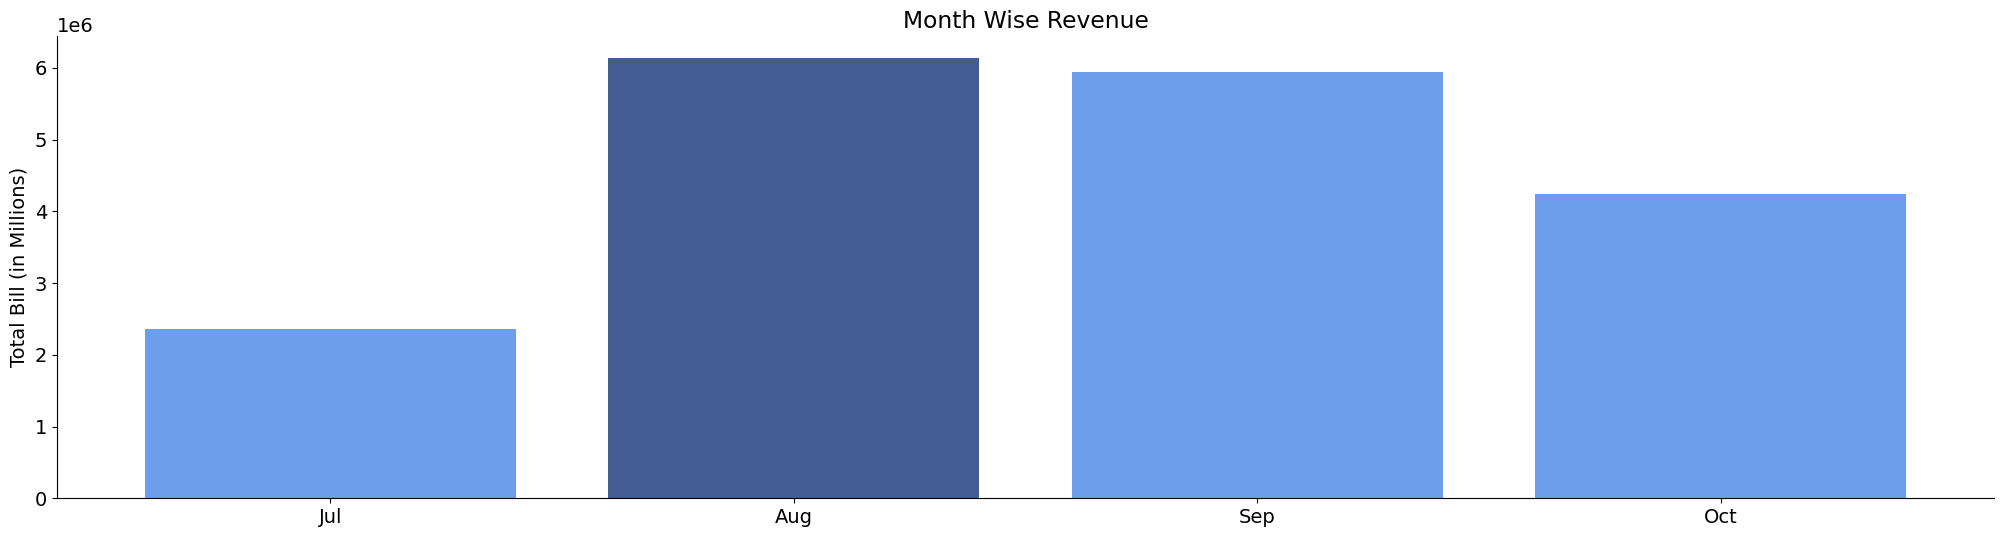

In [17]:
query = '''
select Month, sum(TotalBill) as Revenue from travels group by Month
order by
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end

'''
temp = pd.read_sql(query, conn)
COLORS =[light_blue] * len(temp)
COLORS[1] = dark_blue
plt.bar(data=temp, x='Month', height = 'Revenue', color=COLORS)
plt.ylabel('Total Bill (in Millions)')
plt.title('Month Wise Revenue')
plt.show()

**Insight** - August is when we get the most leads and most revenue followed by September then October then July

**Question** - Compare Revenue Year and month wise based on Trips taken.

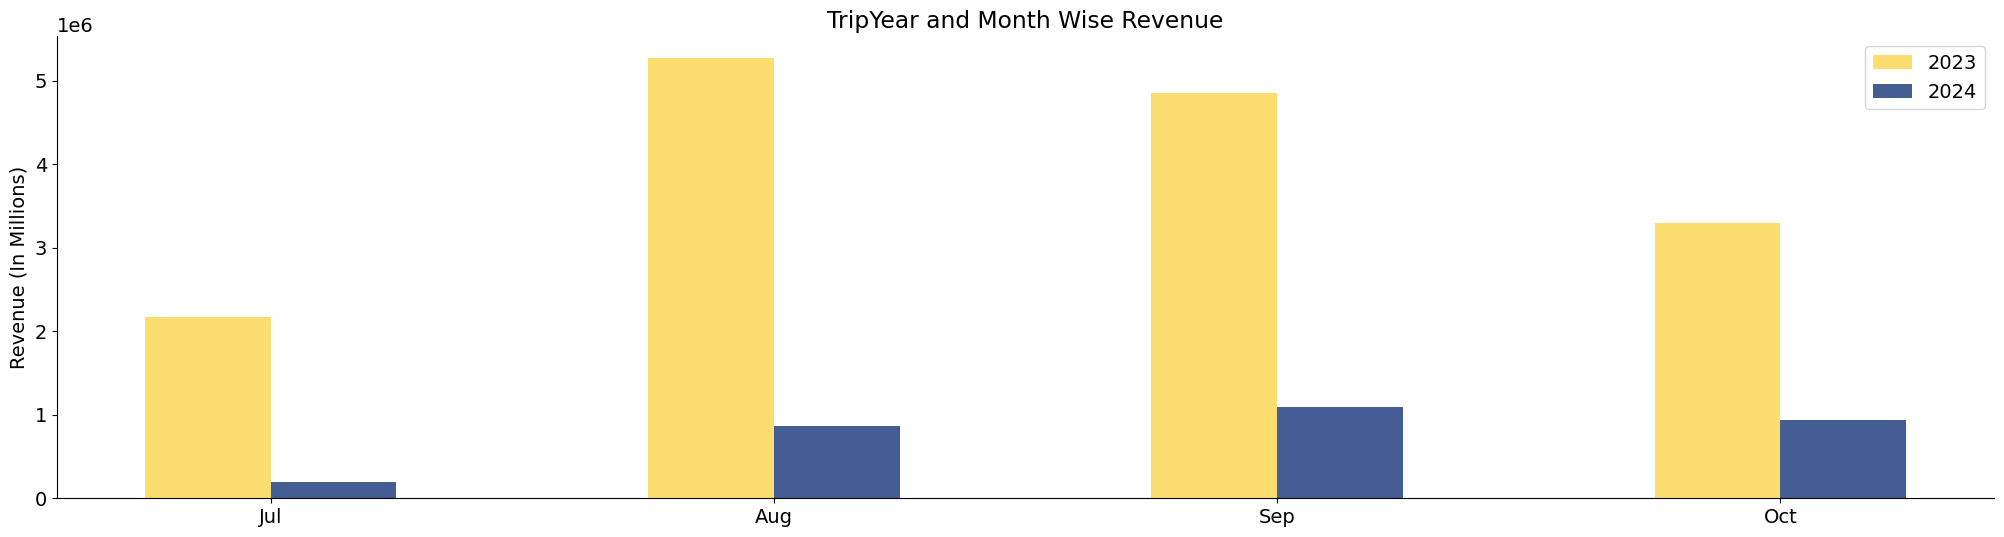

In [18]:
query = '''
select TripYear, Month, sum(TotalBill) as Revenue from travels where TripYear is not null group by 1,2
order by 1,
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end

'''
temp = pd.read_sql(query, conn)
temp['TripYear'] = pd.to_numeric(temp['TripYear'])
temp_2023 = temp[temp['TripYear']==2023]
temp_2024 = temp[temp['TripYear']==2024]
r = np.arange(len(temp_2023))
WIDTH = 0.25
plt.bar(r, height=temp_2023['Revenue'], width=WIDTH , color = ['#FCDE70'])
plt.bar(r+WIDTH, temp_2024['Revenue'], width=WIDTH, color =dark_blue)
plt.xticks(r + WIDTH / 2, temp_2024['Month'])
plt.title('TripYear and Month Wise Revenue')
plt.legend([2023, 2024])
plt.ylabel('Revenue (In Millions)')
plt.show()

**Insight** - Revenue in 2024 has been lesser in all the months as compared to the previous year.


3. From which source are we getting the leads the most and the least?

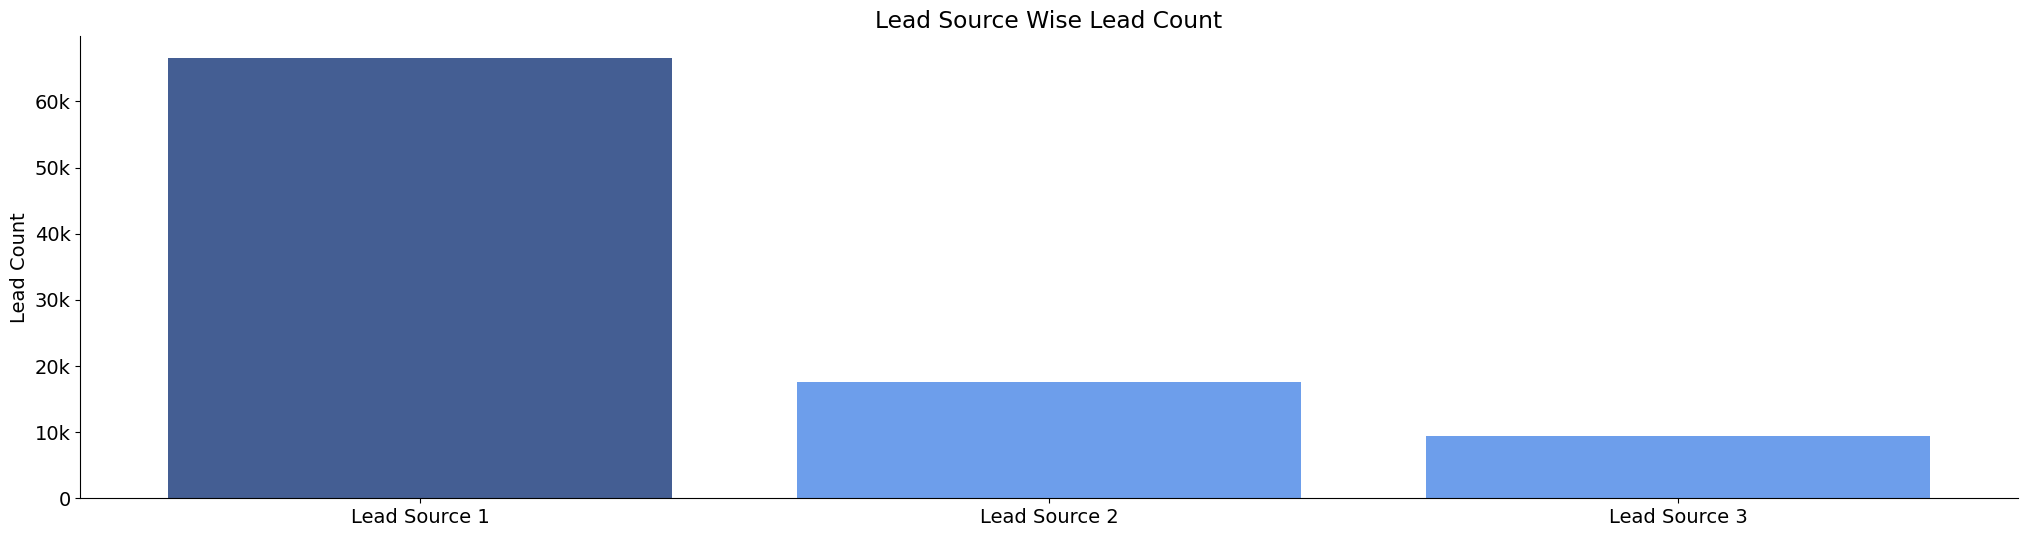

In [19]:
query = '''
select LeadSource, count(LeadSource) as LeadsCount 
from travels group by 1 order by 2 desc
'''

temp = pd.read_sql(query, conn)
COLORS =[light_blue] * len(temp)
COLORS[0] = dark_blue
plt.bar(data=temp, x='LeadSource', height = 'LeadsCount', color=COLORS)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.title('Lead Source Wise Lead Count')
plt.ylabel('Lead Count')
plt.show()

**Question** - Plot Lead Source Wise Revenue

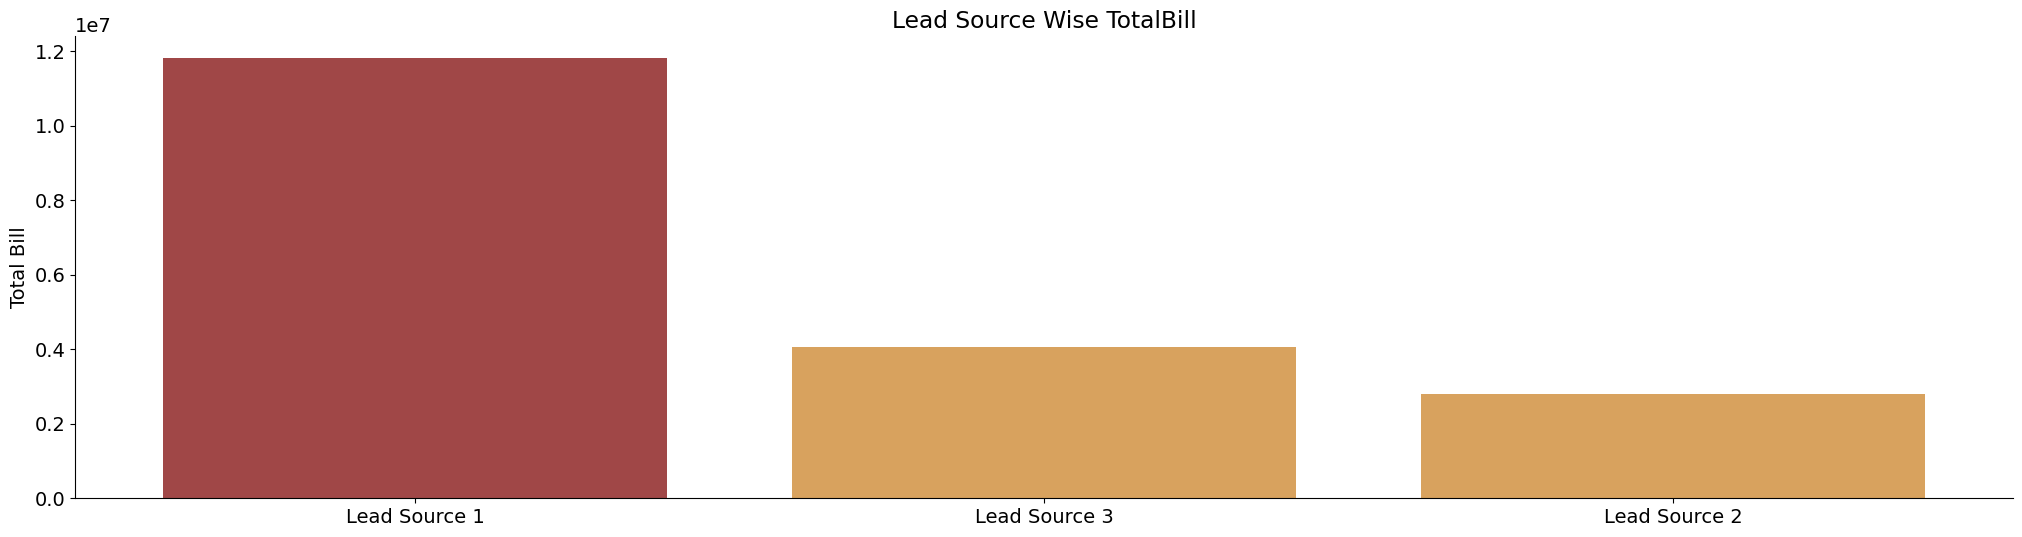

In [20]:
query = '''
select LeadSource, sum(TotalBill) as TotalBill from travels group by 1 order by 2 desc
'''
temp = pd.read_sql(query, conn)
COLORS =['#D8A25E'] * len(temp)
COLORS[0] = '#A04747'
plt.bar(data=temp, x='LeadSource', height = 'TotalBill', color=COLORS)
plt.title('Lead Source Wise TotalBill')
plt.ylabel('Total Bill')
plt.show()

**Insight** : Considering both the charts above, We get most leads and revenue from Lead Source 1. However the Lead Source 2 is the lowest in revenue and Lead Source is lowest in count.

**Question** - What does our Lead Source And Month Wise Trip Count look like?

In [21]:
query = '''
select TripYear, Month, LeadSource, count(LeadSource) as LeadCount from travels where TripYear is not null group by 1,2,3
order by 1,
  case when Month = 'Jul' then 1
    when Month = 'Aug' then 2
    when Month = 'Sep' then 3
    when Month = 'Oct' then 4
    else 0
  end,
  2

'''

temp = pd.read_sql(query, conn)
temp['TripYear'] = pd.to_numeric(temp['TripYear'])
temp_2023 = temp[temp['TripYear']==2023]
temp_2024 = temp[temp['TripYear']==2024]
r = np.arange(len(temp_2023))
WIDTH = 0.25

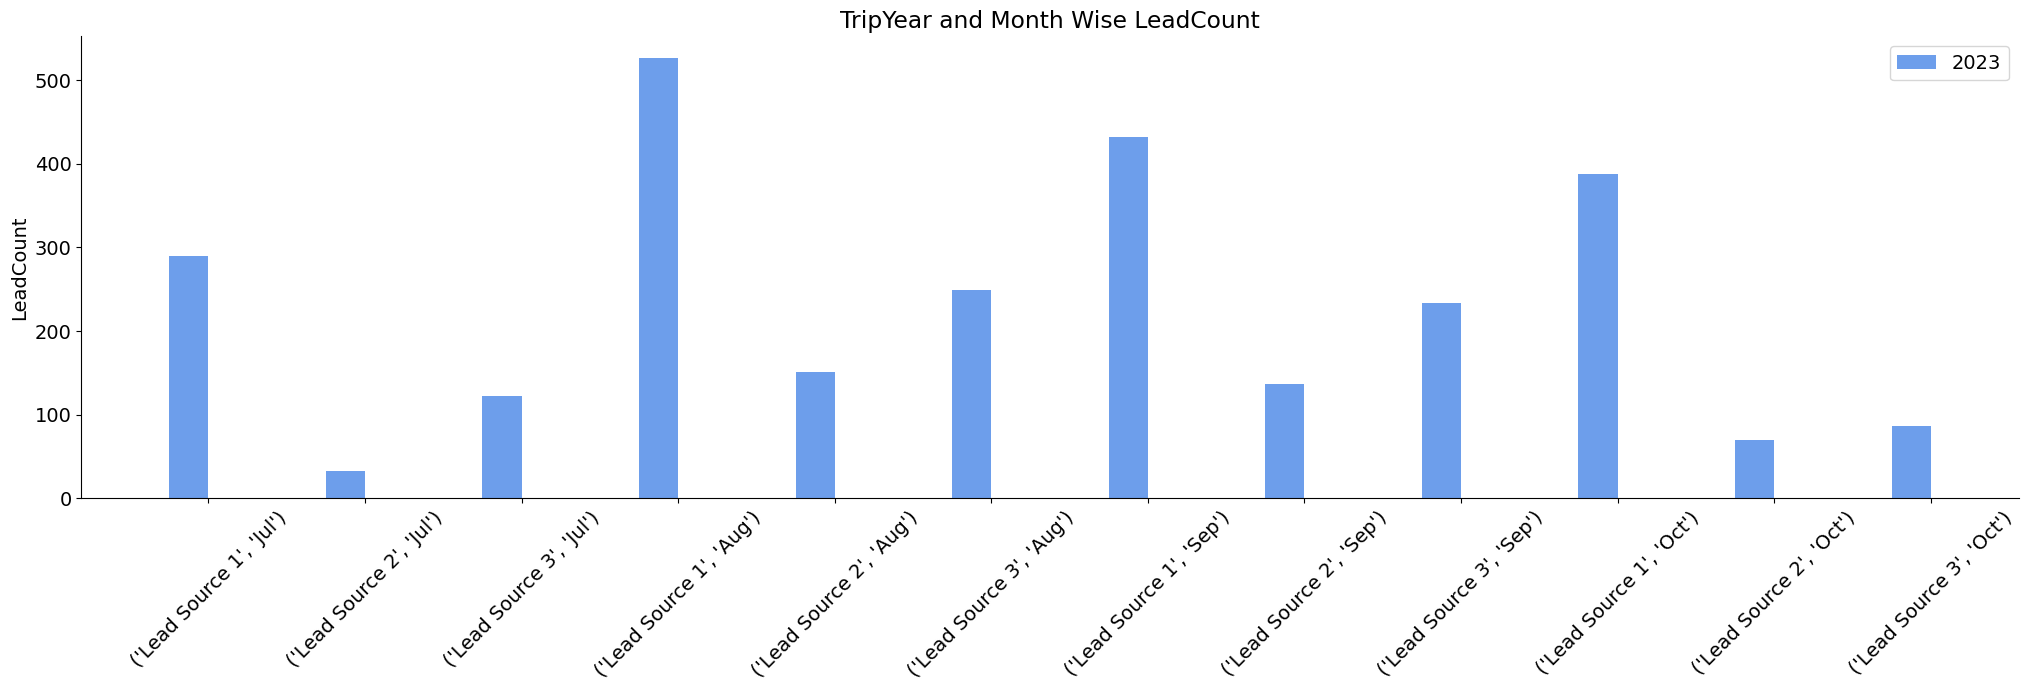

In [22]:
plt.bar(r, height=temp_2023['LeadCount'], width=WIDTH , color=light_blue)
plt.xticks(r + WIDTH / 2, zip(temp_2023['LeadSource'], temp_2023['Month']), rotation=45)
plt.title('TripYear and Month Wise LeadCount')
plt.legend([2023, 2024])
plt.ylabel('LeadCount')
plt.show()

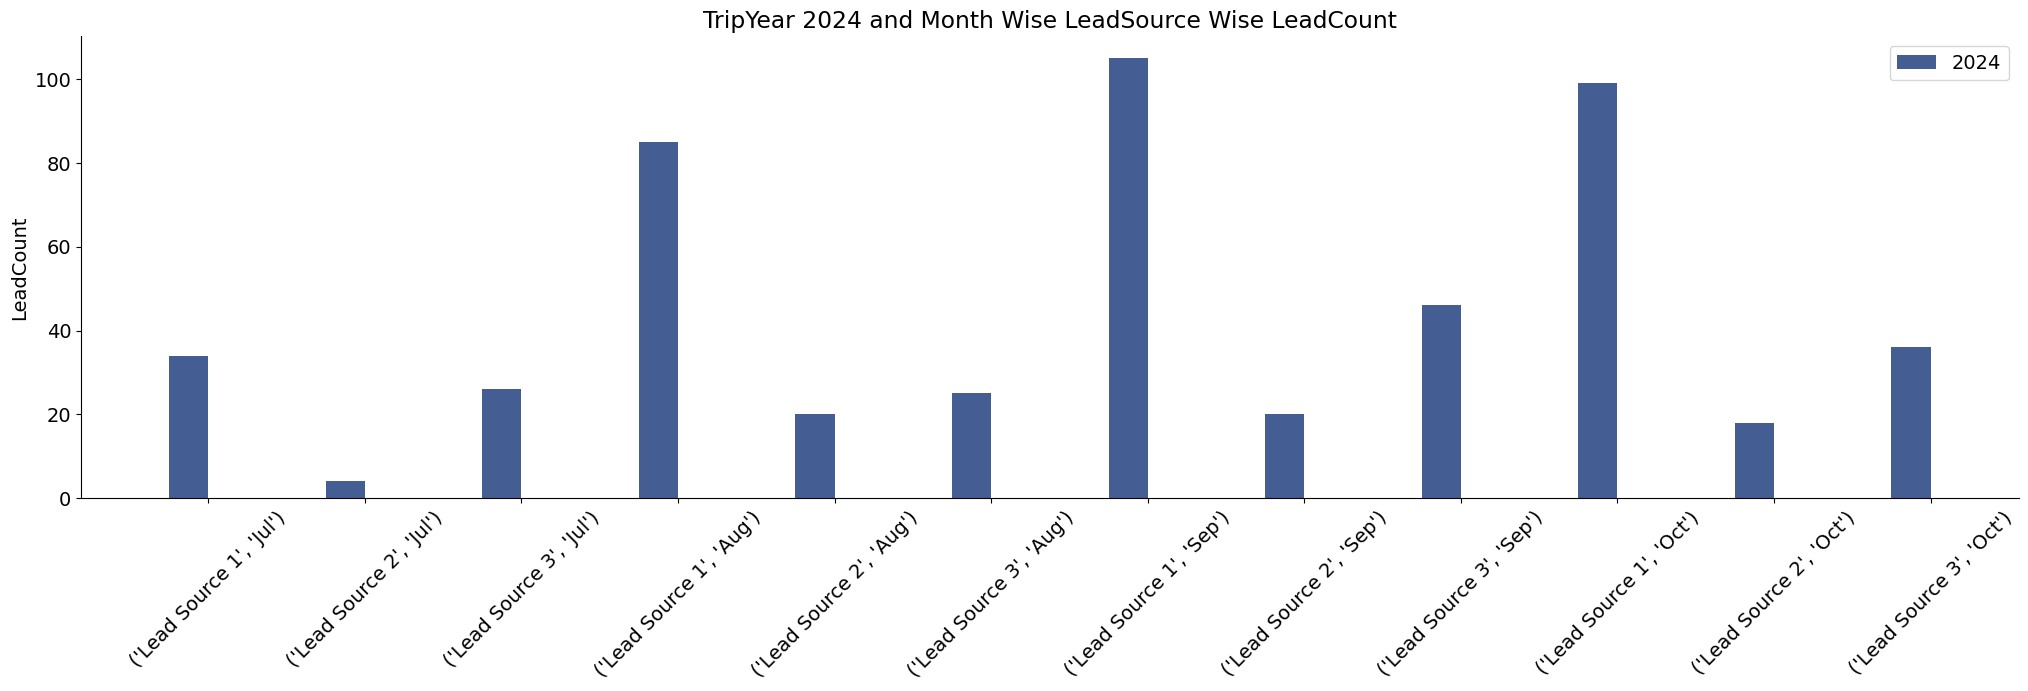

In [23]:
plt.bar(r, height=temp_2024['LeadCount'], width=WIDTH , color=dark_blue)
plt.xticks(r + WIDTH / 2, zip(temp_2024['LeadSource'], temp_2024['Month']), rotation=45)
plt.title('TripYear 2024 and Month Wise LeadSource Wise LeadCount')
plt.legend([2024])
plt.ylabel('LeadCount')
plt.show()

**Insight**

-  Comparing both 2023 and 2024 charts above, Lead counts from all the Lead Sources grew MoM till the peak time which is what can be expected but its not close to what we saw in 2023 and is far lower in 2024

- Lead Count from Lead Source 1 in Sep 2024 didn't drop this year as compared to last year meaning Lead Counts in Sep 2023 dropped after Aug 2023 but not in 2024.

4. **What are the most popular enquiry destinations?**

In [24]:
query = '''
select EnquiryDestination,
      Count(EnquiryDestination) as LeadCount,
      sum(TotalBill) as Revenue
from travels
group by EnquiryDestination
order by 2 desc limit 5
'''
pd.read_sql(query, conn)

,EnquiryDestination,LeadCount,Revenue
0,Meghalaya,7932,686610.0
1,Bali,6806,938252.0
2,Ladakh,6657,1590486.0
3,Spiti Valley,6190,958192.0
4,Leh Ladakh,5698,758208.0


**Insight** -  Meghalaya is the most populare enquiry destination but we don't get the maximum revenue (Highest Total Bill) from there.

**Question** - Which destination is being enquired about the most and what's the revenue from there like??

In [25]:
query = '''
select EnquiryDestination,
        Count(EnquiryDestination) as LeadCount,
        sum(TotalBill) as Revenue
from travels where EnquiryDestination is not null
group by EnquiryDestination order by 3 desc limit 5
'''
pd.read_sql(query, conn)

,EnquiryDestination,LeadCount,Revenue
0,Ladakh,6657,1590486.0
1,Spiti Valley,6190,958192.0
2,Europe,1722,952050.0
3,Bali,6806,938252.0
4,Leh Ladakh,5698,758208.0


**Insight** -  If we see Ladakh is the place where we get the most revenue however the lead count is comparatively lesser than Meghalaya


## Conversion and Client Insights

5. **What percentage of leads are from ex-clients?**

In [26]:
query = '''
select round(count(*)*1.0/(select count(*) from travels)*100,3) as ExClient_PctLeads
from travels where ExClient = 'Yes'
'''
pd.read_sql(query, conn).values[0][0]

3.658

**Insight** : The conversion rate from ExClients is 3.65% meaning 4 out of 100 conversions come from clients who have travelled with us or availed our services in the past

6. What is the overall conversion rate?

In [27]:
#Using Python
pct = round(len(df[df['Status']=='Converted'])/len(df)*100,3)
print(f' The overall conversion rate is {pct}%')

 The overall conversion rate is 3.457%


In [28]:
#Using SQL
query = '''
select round(count(*)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate from travels where Status = 'Converted'
'''
pd.read_sql(query, conn).values[0][0]

3.457

7. **Which sources of leads have the highest conversion rates?**

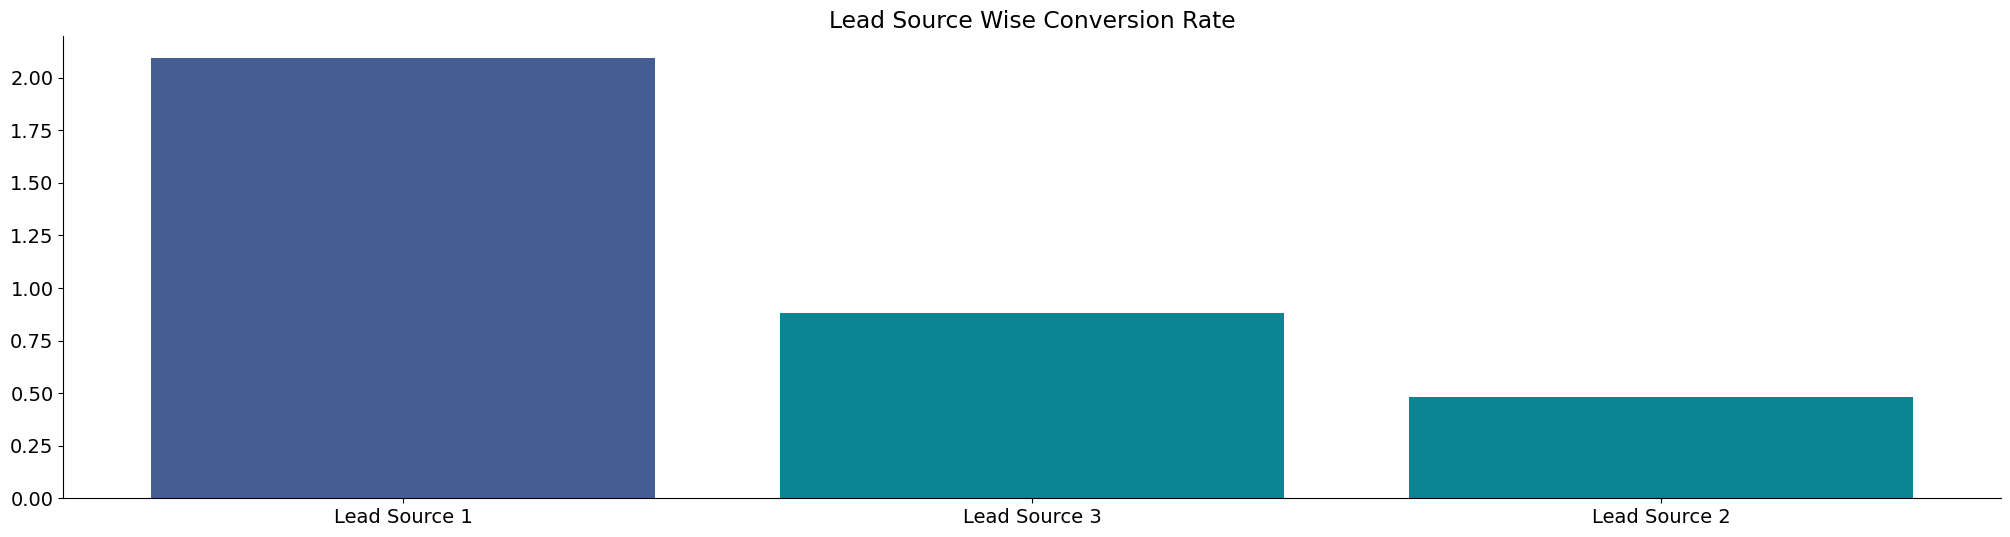

In [29]:
query = '''
select LeadSource, round(count(*)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate
from travels where Status = 'Converted'
group by 1 order by 2 desc
'''
temp = pd.read_sql(query, conn)
COLORS =['#0B8494'] * len(temp)
COLORS[0] = dark_blue
plt.bar(data=temp, x='LeadSource', height = 'Conversion_Rate', color=COLORS)
plt.title('Lead Source Wise Conversion Rate')
plt.show()

**Insight** - Conversion Rate from the Lead Source 1 is the highest.

8. Which destinations have the highest conversion rates?

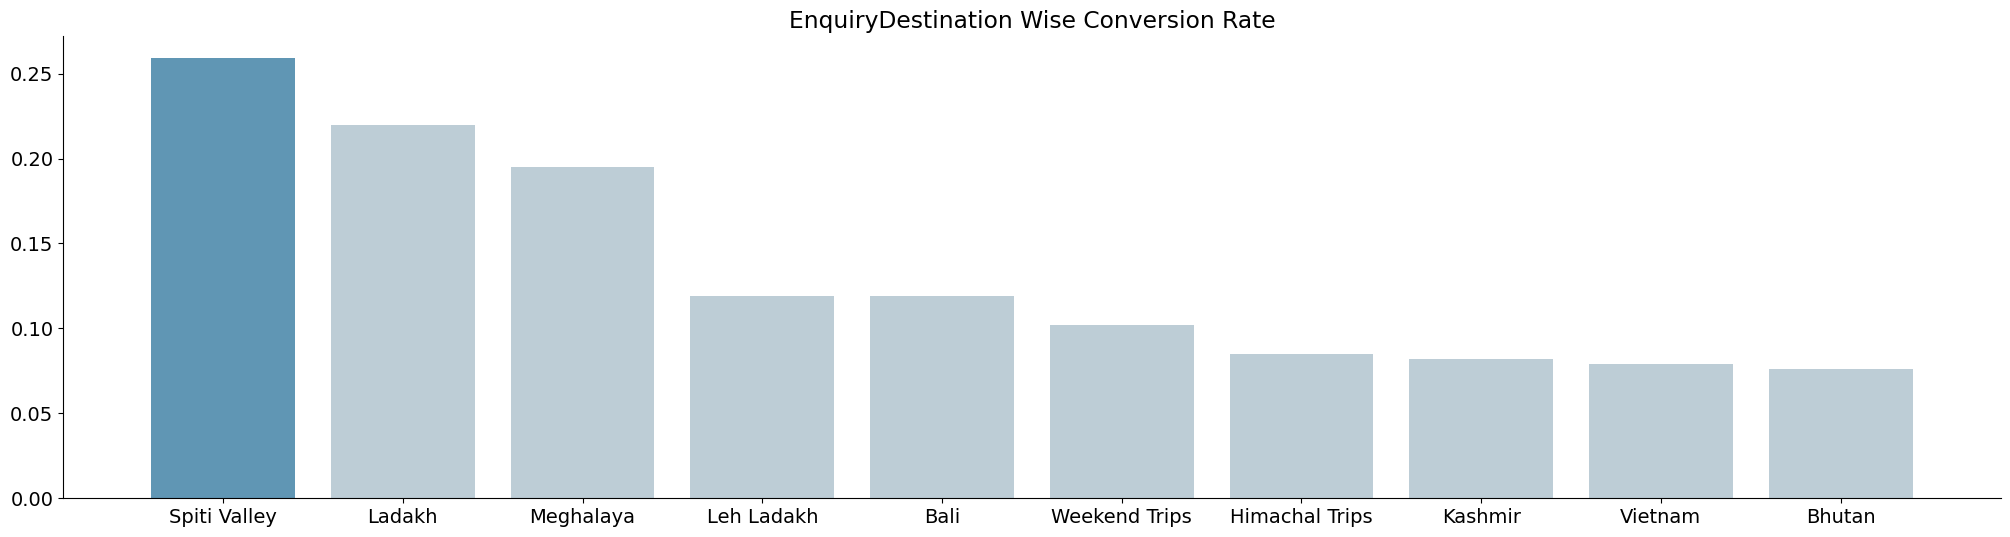

In [30]:
query = '''
select EnquiryDestination, round(count(EnquiryDestination)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate 
        from travels
where Status = 'Converted' and EnquiryDestination is not null
group by 1
order by 2 desc
limit 10
'''
temp = pd.read_sql(query, conn)
COLORS =['#BDCDD6'] * len(temp)
COLORS[0] = '#6096B4'
plt.bar(data=temp, x='EnquiryDestination', height = 'Conversion_Rate', color=COLORS)
plt.title('EnquiryDestination Wise Conversion Rate')
plt.show()

**Insight**

- Conversion Rate is the maximum for Spiti Valley followed by Ladakh and Meghalaya.

## Detailed Performance Analysis
9. **Who are the top performers in terms of number of conversions?**

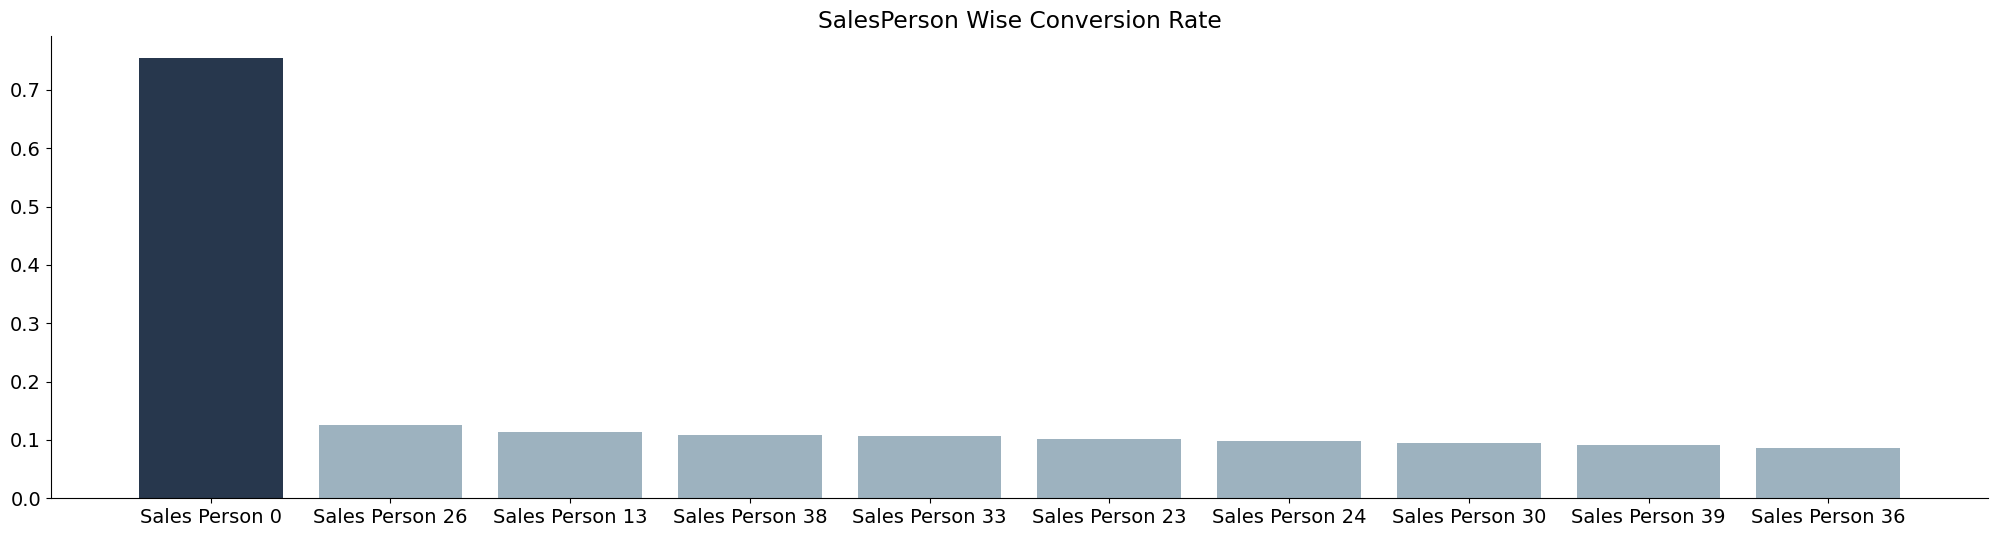

In [31]:
query = '''
select AssignedTo, count(AssignedTo),
      round(count(ConvertedBy)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate from travels
group by 1
order by 3 desc
limit 10
'''

temp = pd.read_sql(query, conn)
COLORS =['#9DB2BF'] * len(temp)
COLORS[0] = '#27374D'
plt.bar(data=temp, x='AssignedTo', height = 'Conversion_Rate', color=COLORS)
plt.title('SalesPerson Wise Conversion Rate')
plt.show()

**Insight**

- Sales Person 0 has done a good job organization wide. He was able to convert 0.75% leads compared to the total leads that was given to the organization. His leads that were converted contributed upto 0.75% to the organization total.

**Question** - Which Sales Person Did the best and the worst (conversion rate wise) in each Lead Source??

In [32]:
query = '''
with cte as (
        select LeadSource, AssignedTo, 
                round(count(AssignedTo)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate
        from travels where Status = 'Converted'
        group by 1,2),
rn_cte as (select *, row_number() over(partition by LeadSource 
            order by Conversion_Rate desc) as row_num 
            from cte)

select LeadSource, AssignedTo, Conversion_Rate from rn_cte where row_num = 1
'''
pd.read_sql(query, conn)

,LeadSource,AssignedTo,Conversion_Rate
0,Lead Source 1,Sales Person 0,0.474
1,Lead Source 2,Sales Person 0,0.061
2,Lead Source 3,Sales Person 0,0.219


**Insight** - Sales Person 0 is having the maximum conversion rate across all the Lead Sources.

In [33]:
query = '''
with cte as (
        select LeadSource, AssignedTo, round(count(AssignedTo)*1.0/(select count(*) from travels)*100,3) as Conversion_Rate
        from travels where Status = 'Converted'
        group by 1,2),
rn_cte as (select *, row_number() over(partition by LeadSource 
            order by Conversion_Rate asc) as row_num from cte)

select LeadSource, AssignedTo, Conversion_Rate from rn_cte where row_num = 1
'''
pd.read_sql(query, conn)

,LeadSource,AssignedTo,Conversion_Rate
0,Lead Source 1,Sales Person 49,0.001
1,Lead Source 2,Sales Person 12,0.001
2,Lead Source 3,Sales Person 12,0.001


**Insight** -  

- Sales Person 49 has the least conversion rate in Lead Source 1.
- Sales Person 12 has the least conversion rate in Lead Source 2 and 3.


10. **What is the average conversion time (time from lead date to conversion date)?**

In [34]:
cols = list(df.columns[df.columns.str.contains('Date')])
for i in cols:
    df[i] = pd.to_datetime(df[i])

In [35]:
conv_days = (df['ConversionDate'] -  df['LeadDate']).mean().days
print(f'It takes an avg of {conv_days} days to convert a lead')

It takes an avg of 10 days to convert a lead


11. **What is the average cost per person and total bill for converted leads?**

In [36]:
query = '''
select round(avg(PerPersonCost),2) as Avg_PerPersonCost,
      round(avg(TotalBill),2) as Avg_TotalBill
from travels

'''
pd.read_sql(query, conn)

,Avg_PerPersonCost,Avg_TotalBill
0,2747.94,5778.49


12. **Which EnquiryDestination has the highest average total Bill?**

In [37]:
query = '''
select EnquiryDestination, round(avg(PerPersonCost),2) as AvgPerPersonCost,
      round(avg(TotalBill),2) as AvgTotalBill
from travels where EnquiryDestination is not null
group by 1
having round(avg(PerPersonCost),2) > 0
order by 3 desc limit 1

'''
pd.read_sql(query, conn)

,EnquiryDestination,AvgPerPersonCost,AvgTotalBill
0,Ladakh - Manali to Manali,3024.0,24192.0


13. Which EnquiryDestination has the highest average per person cost?

In [38]:
query = '''
select EnquiryDestination, round(avg(PerPersonCost),2) as AvgPerPersonCost,
        round(avg(TotalBill),2) as AvgTotalBill
from travels where EnquiryDestination is not null
group by 1 having round(avg(PerPersonCost),2) > 0
order by 2 desc limit 1

'''
pd.read_sql(query, conn)

,EnquiryDestination,AvgPerPersonCost,AvgTotalBill
0,Europe BYOG,10075.56,15069.44


## Specific Insights and Anomalies
13. **Are there any notable trends in trip dates? (e.g., seasonality)**

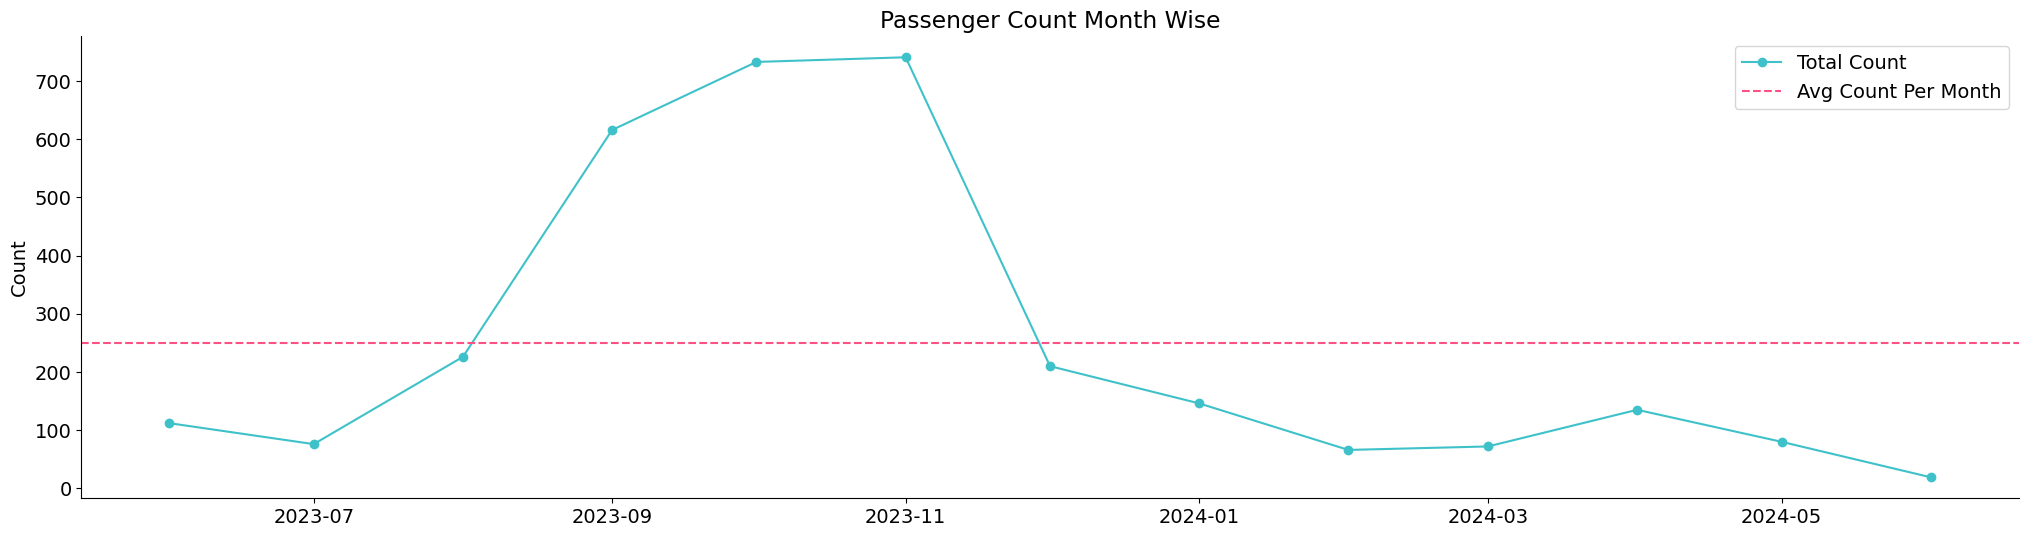

In [39]:
query = '''

with cte as (
select strftime("%Y-%m", TripDate) as TripDate, 
        count(TripDate) as VisitorsCount 
    from Travels where TripDate is not null group by 1 order by 1)
    
select *, round(sum(VisitorsCount) over()*1.0/(select count(VisitorsCount) from cte),0) as Average from cte

'''
temp = pd.read_sql(query, conn)
temp['TripDate'] = pd.to_datetime(temp['TripDate']).dt.date
plt.plot(temp['TripDate'], temp['VisitorsCount'], label='Total Count',marker='o', color='#3FC1C9')
plt.axhline(temp['Average'].unique(), linestyle='dashed', color='#FC5185', label='Avg Count Per Month')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Passenger Count Month Wise')
plt.legend()
plt.show()

**Insight** - Lot of trips are happening from September to Mid Novemeber

14. **Do ex-clients tend to have higher or lower conversion rates and average bill amounts compared to new clients?**

In [40]:
query = '''
select ExClient, 
    round(sum(case when ExClient = 'Yes' and Status = 'Converted' then 1 else 0 end)*1.0/count(*)*100,3) as ExClient_ConvPct,
    round(sum(case when ExClient is null and Status = 'Converted' then 1 else 0 end)*1.0/count(*)*100,3) as NewClient_ConvPct
    from travels
  group by ExClient

'''
temp = pd.read_sql(query, conn)
temp['ExClient'][0] ='No'
temp

,ExClient,ExClient_ConvPct,NewClient_ConvPct
0,No,0.000,2.988
1,Yes,15.819,0.000


**Insight**

- We have more conversion rate from ExClient as opposed to New Client. 
- 15% Conversion Rate is from ExClient however we have only 2% Conversion Rate from old Client which means we are not doing a good job in attracting new clients and converting them.


15. **Are there any anomalies or outliers in the data? (e.g., extremely high or low costs, unusually long or short conversion times)**

In [41]:
def get_outliers(df, col):
    q1, q2, q3 = list(df[col].quantile([0.25, 0.5, 0.75]).values)
    iqr = q3 - q1
    upperbound= q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr
    outliers = df[(df[col]>upperbound) |  (df[col]<lowerbound)]
    return outliers

In [42]:
#Outliers Based on PerPersonCost
PerPersonCost_outliers = get_outliers(df, 'PerPersonCost').reset_index(drop=True)
PerPersonCost_outliers.head()

,LeadDate,LeadSource,Name,Phone,AssignedTo,EnquiryDestination,ExClient,Status,ConversionDate,Trip,TripDate,BookingID,Pax,PerPersonCost,TotalBill,ConvertedBy,Date,Month,TripYear
0,2023-07-17 00:22:00,Lead Source 1,Tr,)&$**&)^)^,Sales Person 27,None,None,Converted,2023-07-25 18:01:52,BYOG,2023-06-17,WON)^!&#),2.0,5560.0,11120.0,Sales Person 27,2023-07-17,Jul,2023
1,2023-07-17 03:39:00,Lead Source 3,fm{mOfHns n,(&@**)##^!,Sales Person 11,Kerala BYOG,Yes,Converted,2023-07-31 20:53:36,Bali Backpacking (6N/7D) - Ex-Delhi,2023-09-05,WOI))(*^%,1.0,7056.0,7056.0,Sales Person 22,2023-07-17,Jul,2023
2,2023-07-18 04:59:00,Lead Source 3,Snnmi,(@@@#(&%$),Sales Person 0,Spiti Valley,None,Converted,2023-08-18 19:33:15,BYOG - International,2023-11-28,WOI))(@$@,1.0,13684.0,13684.0,Sales Person 41,2023-07-18,Jul,2023
3,2023-07-19 15:18:00,Lead Source 1,Fznfnyqs {mXs,)(*$(((**(,Sales Person 8,None,None,Converted,2023-07-31 22:33:48,Vietnam Backpacking (7N/8D),2023-09-04,WOI))(*^#,1.0,7447.0,7447.0,Sales Person 8,2023-07-19,Jul,2023
4,2023-07-19 16:28:00,Lead Source 1,fmnjmplygFx uz,(#(&^%@)*#,Sales Person 17,None,None,Converted,2023-07-23 13:48:29,Bali Backpacking (6N/7D) - Ex-Mumbai,2023-09-05,WOI))($#%,1.0,6968.0,6968.0,Sales Person 17,2023-07-19,Jul,2023


In [43]:
# Analyze Total Bill for PerPersonCost Outliers
total_bill_outliers = PerPersonCost_outliers['TotalBill'].sum()
average_bill_outliers = round(PerPersonCost_outliers['TotalBill'].mean(),2)

print(f"Sum Total Bill for PerPersonCost Outliers: {total_bill_outliers}")
print(f"Average Total Bill for PerPersonCost Outliers: {average_bill_outliers}")

Sum Total Bill for PerPersonCost Outliers: 4182135.0
Average Total Bill for PerPersonCost Outliers: 18104.48


In [44]:
TotalBillOutliers = get_outliers(df, 'TotalBill').reset_index(drop=True)
TotalBillOutliers.head()

,LeadDate,LeadSource,Name,Phone,AssignedTo,EnquiryDestination,ExClient,Status,ConversionDate,Trip,TripDate,BookingID,Pax,PerPersonCost,TotalBill,ConvertedBy,Date,Month,TripYear
0,2023-07-18 04:59:00,Lead Source 3,Snnmi,(@@@#(&%$),Sales Person 0,Spiti Valley,None,Converted,2023-08-18 19:33:15,BYOG - International,2023-11-28,WOI))(@$@,1.0,13684.0,13684.0,Sales Person 41,2023-07-18,Jul,2023
1,2023-07-19 22:55:00,Lead Source 1,mfInx,)@##&@@%&#,Sales Person 0,Spiti Valley,None,Converted,2023-07-28 19:09:18,BYOG,2023-08-06,WON)^!(@!,12.0,1707.0,20481.0,Sales Person 61,2023-07-19,Jul,2023
2,2023-07-20 17:31:00,Lead Source 1,~fSf{,*(*^)!)^(^,Sales Person 35,None,None,Converted,2023-07-29 14:03:33,BYOG - International,2023-12-30,WOI))(*)),10.0,1460.0,14600.0,Sales Person 67,2023-07-20,Jul,2023
3,2023-07-20 18:18:00,Lead Source 1,Inmxf,)@##&@@%&#,Sales Person 0,Bali,None,Converted,2023-07-28 19:09:18,BYOG,2023-08-06,WON)^!(@!,12.0,1707.0,20481.0,Sales Person 61,2023-07-20,Jul,2023
4,2023-07-21 19:37:00,Lead Source 1,Poffnjssy,)(#@!()^^%,Sales Person 32,None,Yes,Converted,2023-07-24 12:15:51,Leh Ladakh(Srinagar to Manali),2023-11-07,WON)^!&*$,5.0,2831.0,14154.0,Sales Person 32,2023-07-21,Jul,2023


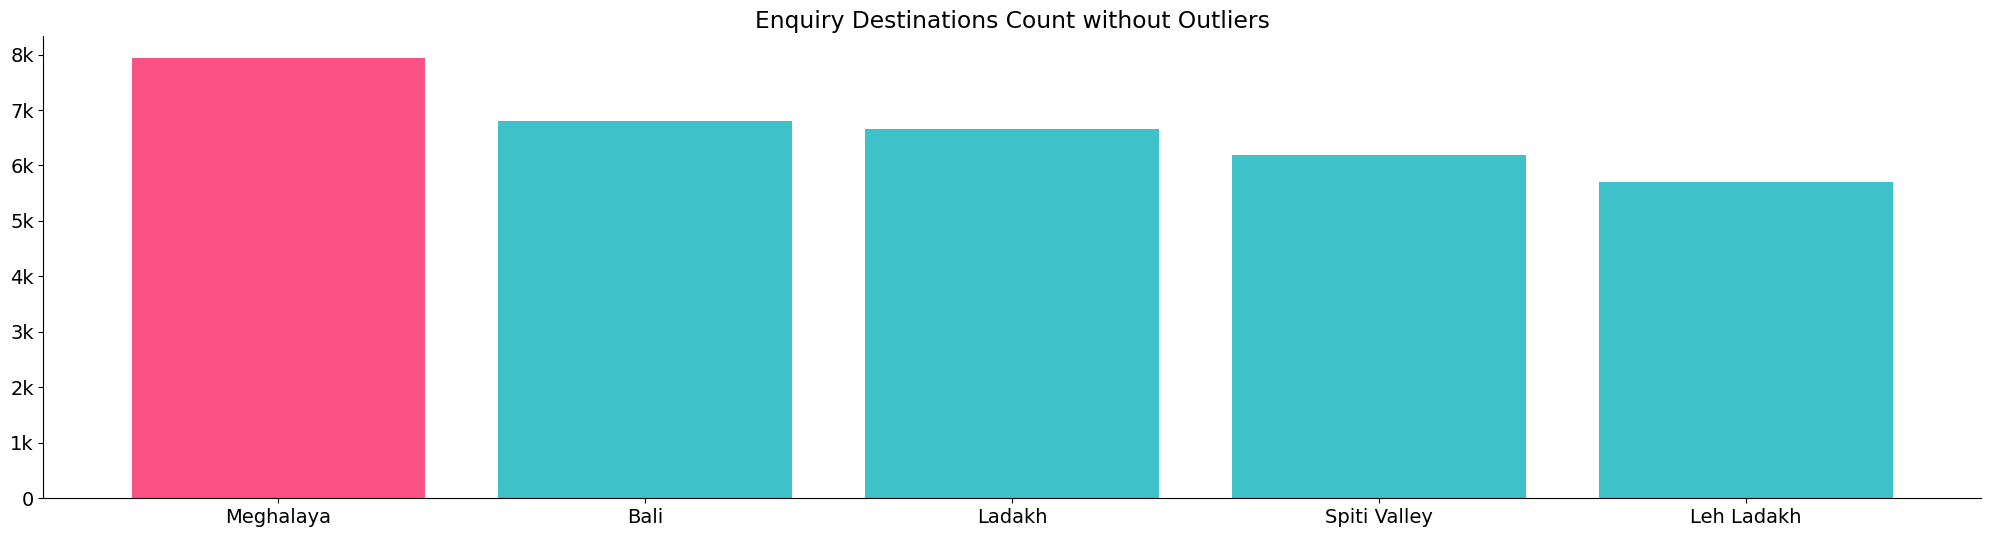

In [45]:
# Enquiry Destinations for PerPersonCost Outliers
destinations_With_outliers = pd.DataFrame(df['EnquiryDestination'].value_counts().head(5)).reset_index()
COLORS = ['#3FC1C9'] * len(destinations_With_outliers)
COLORS[0] = '#FC5185' 
plt.bar(destinations_With_outliers['EnquiryDestination'], destinations_With_outliers['count'], color=COLORS)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.xticks(rotation=0)
plt.title('Enquiry Destinations Count without Outliers')
plt.show()

**Insight**

- In the entire Dataset, the destination that is being asked about the most is Meghalaya.

In [46]:
# Enquiry Destinations for PerPersonCost Outliers
destinations_outliers = PerPersonCost_outliers['EnquiryDestination'].value_counts().head(5)
print("Enquiry Destinations for Outliers:")
destinations_outliers

Enquiry Destinations for Outliers:


EnquiryDestination
Europe           27
Bali             25
Vietnam          25
BYOG - Europe     8
Europe BYOG       7
Name: count, dtype: int64

**Insight**

- The outliers are the people who are interested in visiting places outside of India which could mean Higher Revenue and if served well they may become recurring customers.

In [47]:
# Compare PerPersonCost Outliers with Non-Outliers
non_outliers = df[~df.index.isin(PerPersonCost_outliers.index)]
with_outliers = round(df['TotalBill'].mean(),2)
average_bill_non_outliers = round(non_outliers['TotalBill'].mean(),2)
print(f"Average Total Bill With Outliers: {with_outliers}")
print(f"Average Total Bill Without Outliers: {average_bill_non_outliers}")

Average Total Bill With Outliers: 5778.49
Average Total Bill Without Outliers: 5782.05


## Advanced Analysis and Strategic Insights
16. **What is the relationship between the number of passengers (Pax) and the total bill?**

In [48]:
df[['Pax', 'TotalBill']].corr().apply(lambda x : round(x, 4))

,Pax,TotalBill
Pax,1.0000,0.5731
TotalBill,0.5731,1.0000


In [49]:
# Create bins for Pax
bins = [0, 2, 4, 6, 8, 10, 20]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
df['Pax_Binned'] = pd.cut(df['Pax'], bins=bins, labels=labels, right=False)

# Calculate average PerPersonCost for each Pax bin
grouped = df.groupby('Pax_Binned')['TotalBill'].mean()

# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Pax_Binned'] == '0-2']['TotalBill'],
    df[df['Pax_Binned'] == '2-4']['TotalBill'],
    df[df['Pax_Binned'] == '4-6']['TotalBill'],
    df[df['Pax_Binned'] == '6-8']['TotalBill'],
    df[df['Pax_Binned'] == '8-10']['TotalBill'],
    df[df['Pax_Binned'] == '10+']['TotalBill']
)

print(f"ANOVA test result: F-statistic = {round(anova_result.statistic,3)}, p-value = {anova_result.pvalue}")

ANOVA test result: F-statistic = 280.401, p-value = 1.316736997021471e-249


**Interpreting the ANOVA Result**

- **F-statistic = 280.4006**: Indicates a high variance between groups compared to within groups, suggesting substantial differences between group means.
- **p-value**: An extremely low p-value, far below the 0.05 threshold, leading to the rejection of the null hypothesis.

**Conclusion**

- **Significant Relationship**: There is strong statistical evidence of significant differences in `TotalBill` across different `Pax` groups.
- **Strategic Focus**: The number of passengers significantly affects the total bill, so understanding and optimizing this relationship is crucial for strategic decisions.

In [50]:
df[['Pax', 'PerPersonCost']].corr().apply(lambda x : round(x, 4))

,Pax,PerPersonCost
Pax,1.0000,-0.0035
PerPersonCost,-0.0035,1.0000


**Insight** - There doesn't seem to be much relationship between the Passenger count and PerPersonCost however there is a 0.57 correlation between the Number of Passengers and the total Bill which means if passengers increase there is a 0.57 probability that Total Bill will also increase.


17. **How does the performance of different agents compare?**

In [51]:
query = '''
select AssignedTo, count(AssignedTo) as AssignedLeads,
      count(ConvertedBy) as ConvertedLeads,
      round(count(ConvertedBy)*1.0/count(AssignedTo)*100,2) as ConversionRate,
      coalesce(sum(TotalBill),0) as TotalBill
from travels group by 1 order by 4 desc

'''
SalesPerson_df = pd.read_sql(query, conn)

SalesPerson_df['TotalBill'] = [f"{round(i / 1000,2)}k" if i != 0 else "0" for i in SalesPerson_df['TotalBill'].values.tolist()]

#Top 5 rows
SalesPerson_df.head()

,AssignedTo,AssignedLeads,ConvertedLeads,ConversionRate,TotalBill
0,Sales Person 33,1443,100,6.93,805.74k
1,Sales Person 26,1839,117,6.36,449.67k
2,Sales Person 38,1622,101,6.23,199.93k
3,Sales Person 13,1755,107,6.10,511.74k
4,Sales Person 30,1467,88,6.00,224.25k


In [52]:
#Bottom 5 rows
SalesPerson_df.tail()

,AssignedTo,AssignedLeads,ConvertedLeads,ConversionRate,TotalBill
50,Sales Person 4,1592,26,1.63,146.92k
51,Sales Person 25,1468,23,1.57,104.41k
52,Sales Person 12,1285,16,1.25,156.69k
53,Sales Person 5,1930,24,1.24,150.71k
54,Sales Person 52,128,0,0.00,0


**Insight**

- Sales Person 33 is able to convert more leads assigned to him as compared to his counter parts
- Other Sales Person who have more leads assigned to them are not able to achieve a higher conversion rate than Sales Person 33.


18. **What are the key factors influencing conversion rates? (e.g., lead source, enquiry destination, assigned agent)**

In order to find the key factors, lets take a lot at the performance of the Sales Person 33 who has the highest conversion rate.

In [53]:
sources = list(df[(df['AssignedTo']=='Sales Person 33') & (df['Status']=='Converted')]['LeadSource'].values)
sources_dict = {i : sources.count(i) for i in sources if i!= None}
dict(sorted(sources_dict.items(), key= lambda x:x[-1], reverse=True))

{'Lead Source 1': 59, 'Lead Source 2': 22, 'Lead Source 3': 19}

In [54]:
places = list(df[(df['AssignedTo']=='Sales Person 33') & (df['Status']=='Converted')]['EnquiryDestination'].values)
places_dict = {i : places.count(i) for i in places if i!= None}
print(dict(sorted(places_dict.items(), key= lambda x:x[-1], reverse=True)))

{'Ladakh': 32, 'Leh Ladakh': 15, 'Ladakh BYOG': 9, 'Unknown': 2, 'Himachal Trips': 2, 'Early Bird Offer': 1, 'Manali Solang': 1, 'Spiti Valley': 1}


**Insight** - 

- The analysis above is helpful to identify the top-performing salesperson's lead sources and destinations. 
- If one salesperson consistently converts leads from a certain source and destination, we can replicate that success with others to improve overall performance.

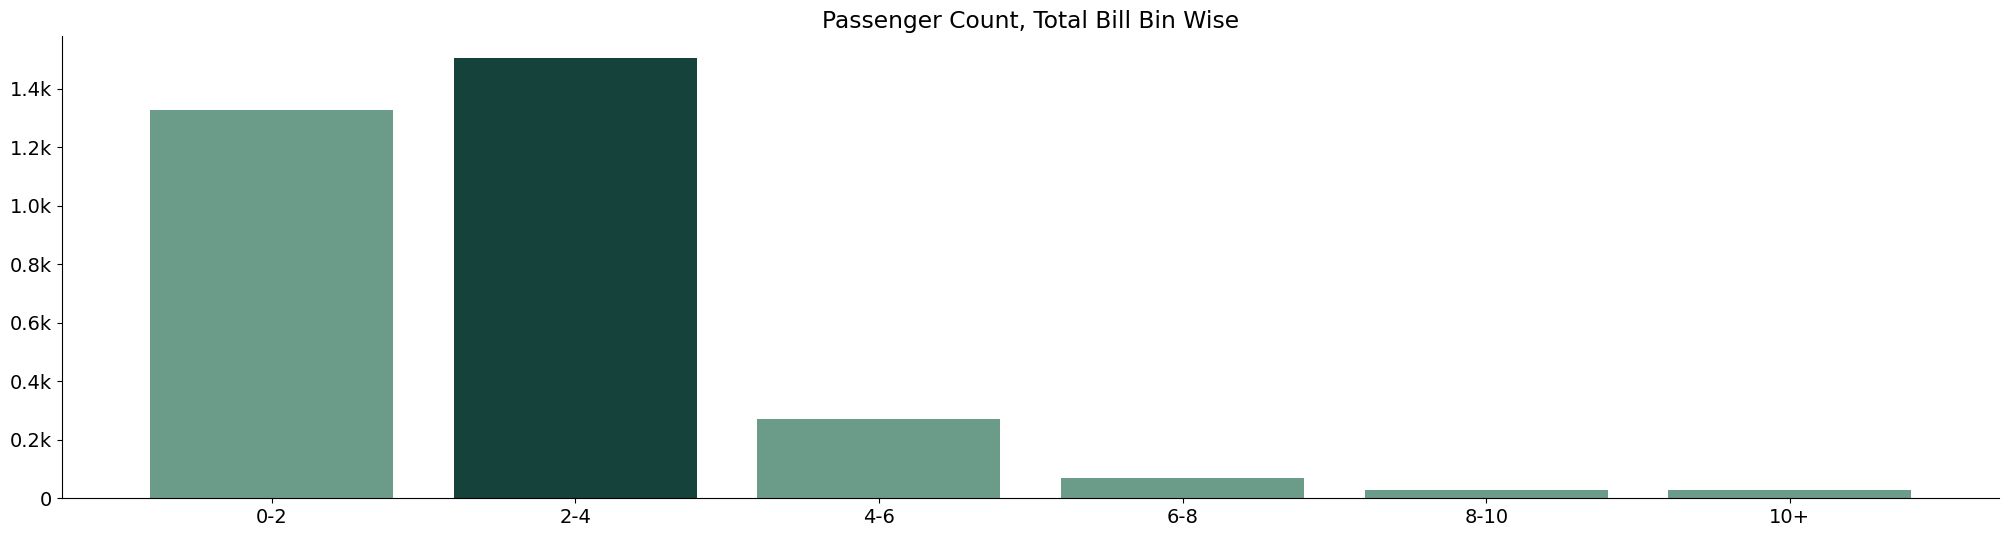

In [55]:
binned = df.groupby('Pax_Binned')['TotalBill'].agg(['sum','count'])
COLORS = ['#6A9C89'] * len(destinations_With_outliers)
COLORS[1] = '#16423C'
plt.bar(binned.index, binned['count'], color=COLORS)
yticks = plt.gca().get_yticks()
ylabels = [f"{round(i / 1000,1)}k" if i != 0 else "0" for i in yticks]
plt.gca().set_yticklabels(ylabels)
plt.xticks(rotation=0)
plt.title('Passenger Count, Total Bill Bin Wise')
plt.show()

In [56]:
total = binned.reset_index()['count'].values.sum()
binned['Pct_Count'] = np.around(binned.reset_index()['count'].values/total*100.0,2)
binned['sum'] = [f"{round(i / 10000,2)}k" if i != 0 else "0" for i in binned['sum'].values.tolist()]
binned = binned.reset_index()
binned.columns = ['TotalBill_Bin', 'Amount', 'TripCount', 'Pct_Count']
binned

,TotalBill_Bin,Amount,TripCount,Pct_Count
0,0-2,346.79k,1327,41.07
1,2-4,949.88k,1504,46.55
2,4-6,322.68k,271,8.39
3,6-8,105.15k,71,2.20
4,8-10,65.57k,30,0.93
5,10+,73.55k,28,0.87


**INSIGHT**

- 87% of the people like to spend under 400,000 INR on trip.


## Putting It All Together
19. **What are the key takeaways from this data analysis?**

The key takeaways from this data analysis is :-

- Ladakh and Spiti Valley are the most popular destinations.
- The average total bill is highest for enquiries to Ladakh.
- Sales Person 33 has the highest conversion rate for assigned leads.
- Sales Person 0 contributes the most to overall conversions.
- Passenger Count and Per Person Cost are weakly related. However, a 0.57 correlation between Passenger Count and Total Bill indicates that the Total Bill tends to increase with more passengers.
- The majority of leads come from Lead Source 1.
- Lead volume peaks in August.
- A higher number of assigned leads does not necessarily result in more conversions.
- In 2024, both trip counts and revenue are lower compared to 2023, even when comparing the same months like August.

20. **What strategic recommendations can be made based on this analysis?**

Below are the strategic recommendations that can be made based on the analysis:-


1. **Reduce Dependency on Lead Source 1**:
   - **Action**: Diversify lead generation strategies to include multiple channels.
   - **Benefit**: Mitigates risk and expands the customer base.

2. **Improve Conversion Rates of Sales Personnel**:
   - **Action**: Provide targeted training and resources to underperforming sales staff.
   - **Benefit**: Increases overall conversion rates and balances workload.

3. **Promote Underperforming Destinations**:
   - **Action**: Run discounts and special promotions for destinations with lower enquiry rates.
   - **Benefit**: Generates more leads and potential revenue from these destinations.

4. **Capitalize on Peak Periods**:
   - **Action**: Focus marketing efforts and promotions during high lead months like August.
   - **Benefit**: Maximizes conversions and revenue during peak interest periods.

5. **Investigate 2024 Performance**:
   - **Action**: Analyze factors leading to the decline in trips and revenue compared to 2023.
   - **Benefit**: Allows for adjustments in strategy to improve performance.
   
6. **Spend Histogram** - 87% of the people like to spend under 400,000 INR on trip.

**Conclusion**

In conclusion, these recommendations provide a strategic approach to optimizing lead management and increasing conversion rates. By implementing these actions, the company can enhance its competitive edge and drive sustainable growth. Continuous monitoring and data-driven decision-making will be key to long-term success.

## Conclusion

- In conclusion, the analysis of the travel dataset has provided valuable insights into various aspects of the business operations. By examining factors such as popular destinations, conversion rates, lead sources, and revenue trends, we have identified key opportunities and challenges for the travel company.

- The data revealed that Ladakh and Spiti Valley are highly sought-after destinations among travelers, suggesting a strong market demand for packages to these regions. Additionally, the analysis highlighted the exceptional performance of certain sales personnel, indicating the importance of talent and expertise in driving conversions.

- However, the data also uncovered areas for improvement, such as reducing dependency on a single lead source, diversifying marketing efforts, and optimizing lead management strategies. By implementing the recommendations outlined in this report, the travel company can enhance its competitiveness, increase conversion rates, and capitalize on emerging opportunities in the market.

**Closing Note:**

- As the travel industry continues to evolve, it is essential for companies to adapt and innovate to meet the changing needs and preferences of travelers. By leveraging data-driven insights and adopting a proactive approach to business strategy, organizations can position themselves for long-term success and growth.

- I hope that the findings and recommendations presented in this report serve as a valuable resource for the company in achieving its goals and objectives. As always, continuous monitoring and analysis of key performance metrics will be critical to driving ongoing improvements and maintaining a competitive edge in the dynamic travel market.